Download data from https://hydrometrie.wallonie.be/ as anonymous user

Calling Kisters webservices

@author : Pierre Archambeau - 2024

<h1>Load modules</h1>

In [1]:
from datetime import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
from wolfhece.hydrometry import kiwis
from wolfhece.hydrometry.kiwis import hydrometry, station_fields as sf, timeseries_fields as ts

# Create anonymous access to SPW web services

In [2]:
db = hydrometry()

Print available columns in stations

In [3]:
print(db)

Columns in stations :
site_no
station_no
station_name
station_id
station_local_x
station_local_y
station_latitude
station_longitude
river_name
station_gauge_datum
CATCHMENT_SIZE
BV_DCE



<h1>Get all stations with flow rate measurements</h1>

"Official" groups

Available fields :
 - station_name     == name used on hydrometrie.wallonie.be
 - station_no       == code identified on hydrometrie.wallonie.be
 - station_id       == internal index
 - ts_id            == id of the timeserie
 - ts_name          == name of the timeserie
 - parametertype_id
 - parametertype_id

Return : 
 - pandas dataframe

In [4]:
stations = db.get_timeseries_group('flowrate','1h')
print(stations.columns)

Index(['station_name', 'station_no', 'station_id', 'ts_id', 'ts_name',
       'parametertype_id', 'parametertype_name'],
      dtype='object')


<h1>Get ts_id for a specific station<h1>

In [5]:
amay_byname = stations[stations[sf.STATION_NAME.value]=='AMAY']
amay_byid = stations[stations[sf.STATION_ID.value]=='7132']

tsid = int(amay_byname[ts.TS_ID.value])

print(tsid)

245548010


C:\Users\pierre\AppData\Local\Temp\ipykernel_8124\2299450334.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tsid = int(amay_byname[ts.TS_ID.value])


<h1>Get time serie between 2 dates</h1>

Info : maximum download = 250.000 values
The routine will split the interval if necessary.

Return : 
 - pandas timeserie

In [6]:
ts = db.timeseries(fromdate=dt(1960,1,1), todate=dt(2022,2,1), ts_id = tsid)

1960-01-01 00:00:00 1982-10-25 08:00:00
1982-10-25 08:00:00 2005-08-18 16:00:00
2005-08-18 16:00:00 2022-02-01 00:00:00


<AxesSubplot: xlabel='Timestamp'>

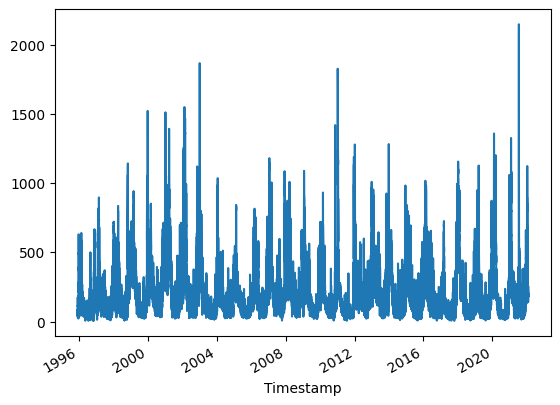

In [7]:
ts.plot()

<h1>Exploring the database more deeply</h1>

In [8]:
#Get all time series available for a specific station
id,df = db.timeseries_list(stationcode='7132')
# id,df = db.timeseries_list(stationname='AMAY')

#Select only flow rate "Q"  (other possibilities : "H" or "v")
flowrate_ts = df[df['parametertype_name']=='Q']['ts_name']
flowrate_ts[flowrate_ts.str.contains('Complet')]


14    05a-Debit ultrason.Complet.Alarmes
17             05-Debit ultrason.Complet
Name: ts_name, dtype: object

Get data

In [9]:
fromdate=dt(2021,1,1)
todate=dt(2022,2,1)
ts = db.timeseries(stationname='AMAY', fromdate=fromdate, todate=todate, ts_name='05-Debit ultrason.Complet')
ts_off = db.timeseries(fromdate=fromdate, todate=todate, ts_id = tsid)

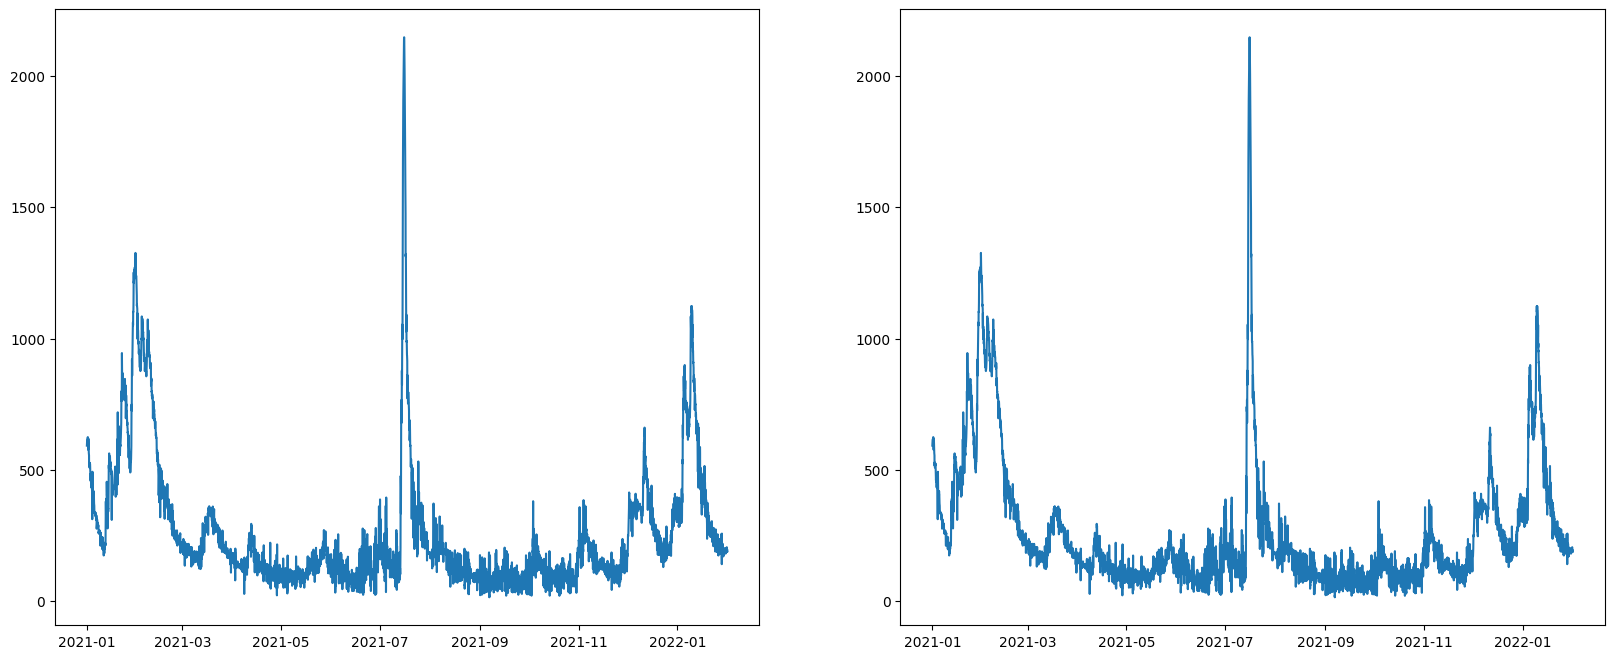

In [10]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,8)
ax[0].plot(ts)
ax[1].plot(ts_off)